In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set Visualization style
sns.set(style='whitegrid')

In [4]:
# Load Dataset
file_path = 'smartmart_customer_data.csv'
data = pd.read_csv(file_path)

In [5]:
print(data.head())
print(data.info())

   CustomerID  Age  Gender  Annual_Income  Purchase_History  Website_Visits  \
0           1   54    Male          49936              9257               4   
1           2   18    Male          82115              2216              91   
2           3   49  Female          54012              5026              89   
3           4   39    Male          86993              5654              39   
4           5   55    Male          40567              7069              48   

   App_Usage  
0         52  
1         16  
2         97  
3         87  
4         29  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Annual_Income     1000 non-null   int64 
 4   Purchase_History  1000 non-null   int64 
 5   Web

In [6]:
# Data Preprocessing
def preprocess_data(df):

    # Check for missing values
    missing_summary = df.isnull().sum()
    print('Missing values in each column:\n', missing_summary)
    print()
    
    # Missing value handling
    if missing_summary.sum() > 0:
        df = df.dropna()

    # Convert data types
    if df['Gender'].dtype != 'category':
        df['Gender'] = df['Gender'].astype('category')

    # Check and remove duplicates
    duplicate_counts = df.duplicated().sum()
    print(f'Found {duplicate_counts} duplicate rows')
    print()
    if duplicate_counts > 0:
        df = df.drop_duplicates()

    return df


In [7]:
# Apply preprocessing function
data_cleaned = preprocess_data(data)
print(data_cleaned.info())

Missing values in each column:
 CustomerID          0
Age                 0
Gender              0
Annual_Income       0
Purchase_History    0
Website_Visits      0
App_Usage           0
dtype: int64

Found 0 duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CustomerID        1000 non-null   int64   
 1   Age               1000 non-null   int64   
 2   Gender            1000 non-null   category
 3   Annual_Income     1000 non-null   int64   
 4   Purchase_History  1000 non-null   int64   
 5   Website_Visits    1000 non-null   int64   
 6   App_Usage         1000 non-null   int64   
dtypes: category(1), int64(6)
memory usage: 48.1 KB
None


Exploratory Data Analysis

In [8]:
# Perform EDA
eda_summary = data_cleaned.describe(include='all').T
eda_summary['variance'] = data_cleaned.select_dtypes(include='number').var()
print(eda_summary)

                   count unique     top freq       mean           std  \
CustomerID        1000.0    NaN     NaN  NaN      500.5    288.819436   
Age               1000.0    NaN     NaN  NaN      43.28     15.368663   
Gender              1000      2  Female  507        NaN           NaN   
Annual_Income     1000.0    NaN     NaN  NaN  60270.795  23170.010947   
Purchase_History  1000.0    NaN     NaN  NaN   5145.396   2750.297722   
Website_Visits    1000.0    NaN     NaN  NaN     50.174      28.41882   
App_Usage         1000.0    NaN     NaN  NaN      50.45     29.490459   

                      min       25%      50%       75%      max      variance  
CustomerID            1.0    250.75    500.5    750.25   1000.0  8.341667e+04  
Age                  18.0      29.0     43.0      56.0     70.0  2.361958e+02  
Gender                NaN       NaN      NaN       NaN      NaN           NaN  
Annual_Income     20124.0  39355.75  60983.0  80677.75  99897.0  5.368494e+08  
Purchase_Histor

In [9]:
# Segment by gender
segment_gender = data_cleaned.groupby('Gender').mean()
print('Mean values by Gender Segment:')
print()
print(segment_gender)

Mean values by Gender Segment:

        CustomerID        Age  Annual_Income  Purchase_History  \
Gender                                                           
Female  516.392505  42.755424   60157.806706       5066.619329   
Male    484.156187  43.819473   60386.991886       5226.409736   

        Website_Visits  App_Usage  
Gender                             
Female       48.954635  50.011834  
Male         51.427992  50.900609  


In [10]:
age_min = data_cleaned['Age'].min()
age_max = data_cleaned['Age'].max()
print(age_min, age_max)

18 70


In [11]:
# Segment by Age groups
age_bins = [18, 30, 45, 60, 71]
age_labels = ['18-29', '30-44', '45-59', '60-70']
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

segment_age = data_cleaned.groupby('Age_Group').mean(numeric_only=True)
print('Mean values by age group segment:')
print()
print(segment_age)

Mean values by age group segment:

           CustomerID        Age  Annual_Income  Purchase_History  \
Age_Group                                                           
18-29      487.866667  23.454902   59604.890196       5123.988235   
30-44      541.480769  36.980769   61206.476923       5293.857692   
45-59      486.766102  52.091525   59237.908475       4905.206780   
60-70      482.700000  64.826316   61487.794737       5343.894737   

           Website_Visits  App_Usage  
Age_Group                             
18-29           50.388235  49.611765  
30-44           49.930769  52.153846  
45-59           50.684746  50.237288  
60-70           49.426316  49.573684  


Data Visualization

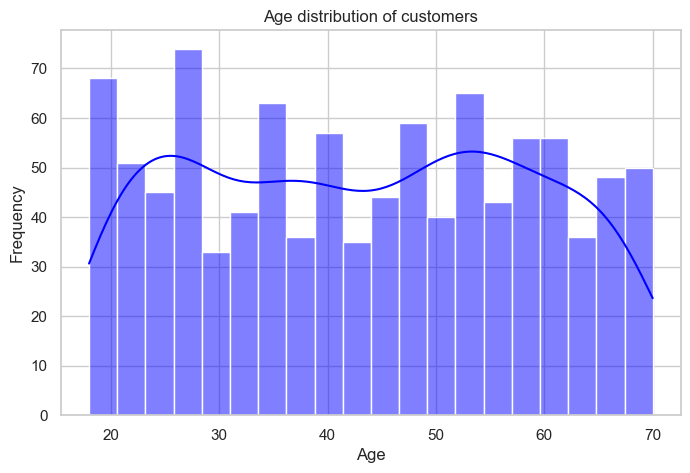

In [12]:
# Distribution plots for customer demographics like Age, Gender and Income

# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Age'], bins=20, kde=True, color='blue')
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

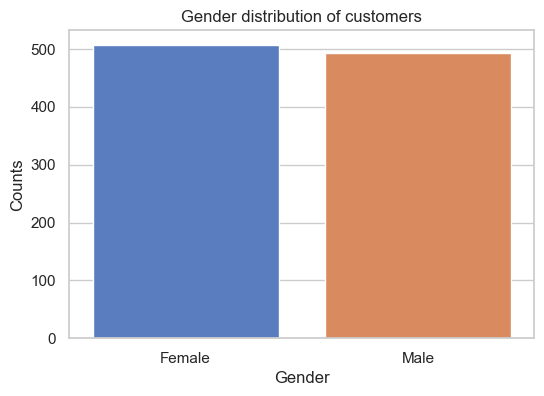

In [13]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data_cleaned, palette='muted')
plt.title('Gender distribution of customers')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

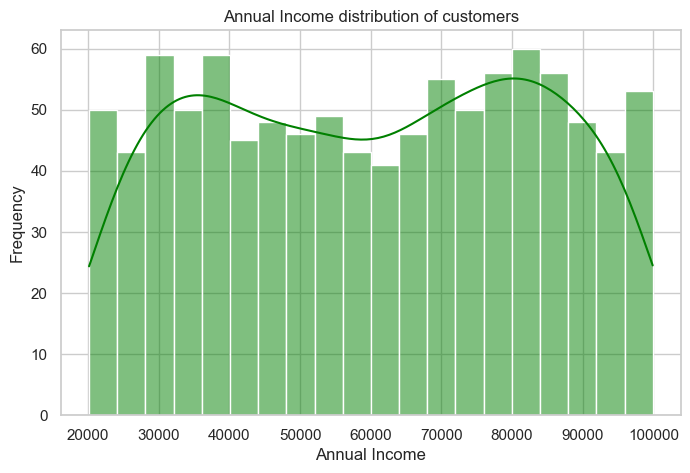

In [14]:
# Annual Income distribution of customers
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Annual_Income'], bins=20, kde=True, color='green')
plt.title('Annual Income distribution of customers')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Bar charts illustrating the marketing startegy effectiveness
# Analyze metrics such as Website_Visits and App_Usage by customer segments

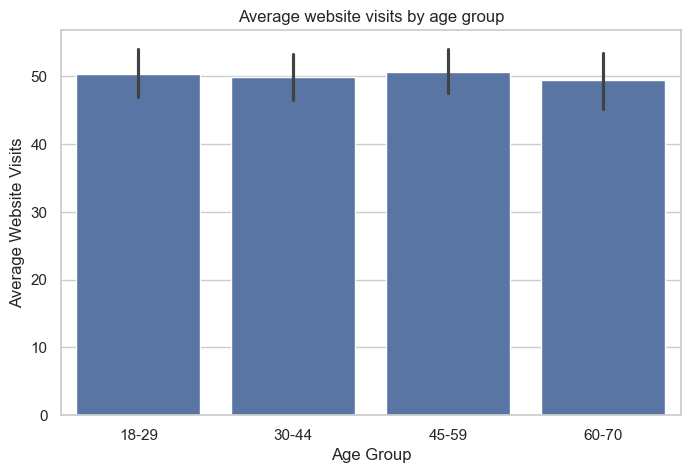

In [16]:
# Bar chart : Website visits vs Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Group', y='Website_Visits', data=data_cleaned, estimator='mean')
plt.title('Average website visits by age group')
plt.xlabel('Age Group')
plt.ylabel('Average Website Visits')
plt.show()

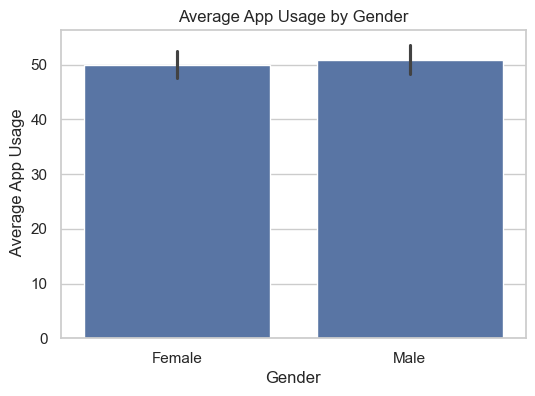

In [17]:
# Bar Chart : App Usage vs Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='App_Usage', data=data_cleaned, estimator='mean')
plt.title('Average App Usage by Gender')
plt.xlabel('Gender')
plt.ylabel(' Average App Usage')
plt.show()

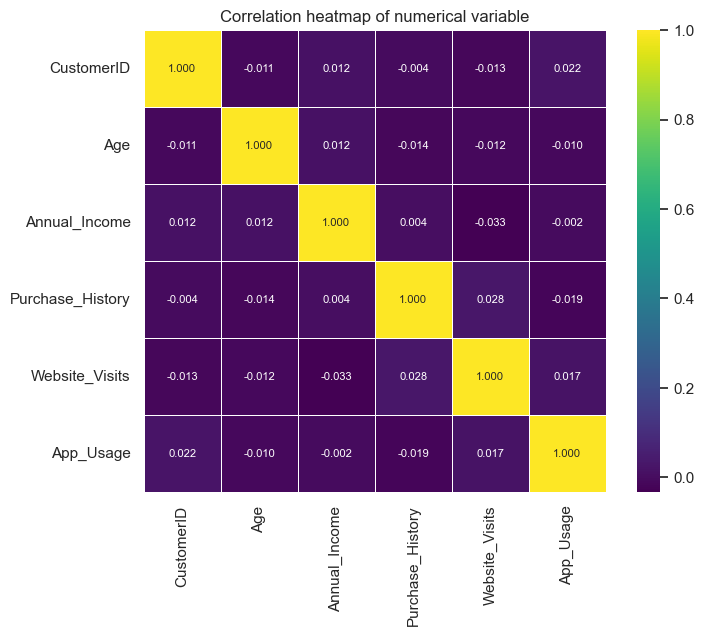

In [20]:
# Heatmap : Correlations between variables
corr = data_cleaned.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis',fmt='.3f', linewidths=0.5, square=True, annot_kws={'size':8})
plt.title('Correlation heatmap of numerical variable')
plt.show()

Recommendations: